In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable
# plt.style.use('ggplot')
from glob import glob

In [31]:
vardrop_path = './logs/var_dropout/N10D10L1000T25/*.json'
vardrop_files = glob(vardrop_path)
metas_vardrop = [json.load(open(f)) for f in vardrop_files]
metas_vardrop.sort(key=lambda x: x['batchsize'])

cmap = plt.get_cmap('viridis')
colors_vardrop = cmap(np.linspace(0, 1, len(metas_vardrop)))

varlayer_path = './logs/var_nlayer/N10D10L1000T25/*.json'
varlayer_files = glob(varlayer_path)
metas_varlayer = [json.load(open(f)) for f in varlayer_files]
metas_varlayer.sort(key=lambda x: x['mask_size'])

cmap = plt.get_cmap('viridis')
colors_varlayer = cmap(np.linspace(0, 1, len(metas_varlayer)))

/tmp/ipykernel_2085158/1621274822.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


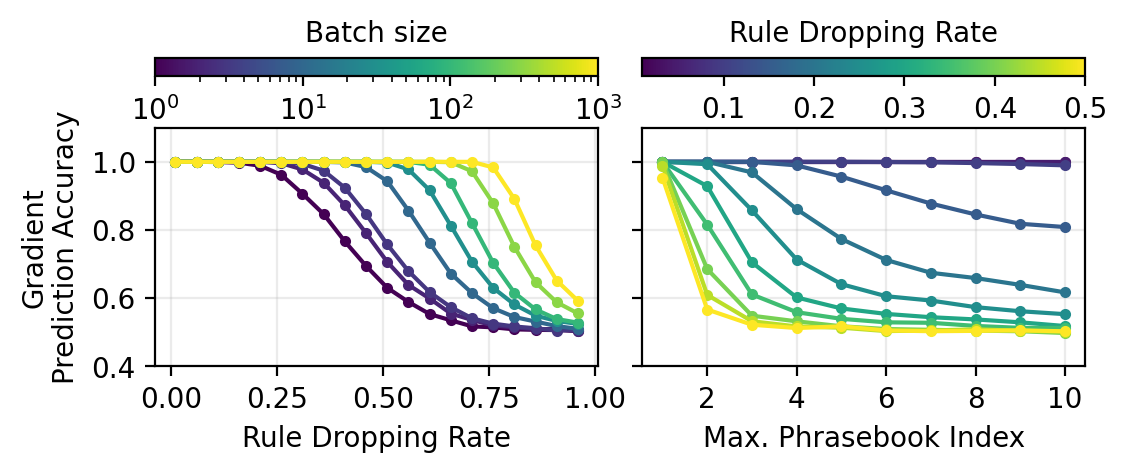

In [61]:
# fig, axs = plt.subplots(2, 2, figsize=(6, 3), sharey=True, dpi=200, height_ratios=[0.1, 1])
fig = plt.figure(figsize=(6, 2), dpi=200)
gs = fig.add_gridspec(2, 2, height_ratios=[0.075, 1], hspace=0.4, wspace=0.1)

batch_sizes = [meta['batchsize'] for meta in metas_vardrop]
cmap = plt.cm.viridis
norm = mpl.colors.LogNorm(vmin=min(batch_sizes), vmax=max(batch_sizes))
colors = [cmap(norm(bs)) for bs in batch_sizes]

# First plot: Gradient Accuracy
ax1 = fig.add_subplot(gs[1,0])
for i, meta in enumerate(metas_vardrop):
    ax1.plot(np.array(meta['mask_sizes'])/100, meta['accs'], label=f"Batch {meta['batchsize']}", color=colors[i], marker='.')
ax1.set_ylabel('Gradient\nPrediction Accuracy', fontsize=10)
ax1.set_xlabel('Rule Dropping Rate', fontsize=10)
ax1.set_ylim(0.4, 1.1)
ax1.grid(True, alpha=0.25)

sm1 = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])
ax1_legend = fig.add_subplot(gs[0,0])
ax1_legend.set_title('Batch size', fontsize=10)
fig.colorbar(sm1, cax=ax1_legend, orientation='horizontal', pad=0.0, shrink=0.1)

# Second plot: Gradient Accuracy
layer_sizes = [meta['mask_size'] for meta in metas_varlayer]
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(layer_sizes)/100, vmax=max(layer_sizes)/100)
colors = [cmap(norm(ls/100)) for ls in layer_sizes]

ax2 = fig.add_subplot(gs[1,1])
for i, meta in enumerate(metas_varlayer):
    ax2.plot(meta['layers_drop'], meta['accs'], color=colors[i], marker='.')
# ax2.set_ylabel('Gradient Prediction Accuracy')
ax2.set_yticklabels([])
ax2.set_xlabel('Max. Phrasebook Index', fontsize=10)
ax2.set_ylim(0.4, 1.1)
ax2.grid(True, alpha=0.25)

sm2 = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm2.set_array([])
ax2_legend = fig.add_subplot(gs[0,1])
ax2_legend.set_title('Rule Dropping Rate', fontsize=10)
fig.colorbar(sm2, cax=ax2_legend, orientation='horizontal', pad=0.0, shrink=0.1)
plt.tight_layout()

plt.savefig('var_dropout_vs_var_layer.pdf', bbox_inches='tight', pad_inches=0)

plt.show()